In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('data.csv')

# Remove rows with missing data
cleaned_df = df.dropna()

droped_df = cleaned_df.drop(columns= 'Url')

# Save the cleaned data to a new CSV file
droped_df.to_csv('cleaned_droped_data.csv', index=False)

# Print a success message
print("The data has been cleaned and saved to 'cleaned_data.csv'.")



The data has been cleaned and saved to 'cleaned_data.csv'.


In [ ]:
df_1 = pd.read_csv('cleaned_droped_data.csv')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3896 entries, 0 to 3895
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Agency                            3896 non-null   object 
 1   Platform                          3896 non-null   object 
 2   Date Sampled                      3896 non-null   object 
 3   Likes/Followers/Visits/Downloads  3896 non-null   float64
dtypes: float64(1), object(3)
memory usage: 121.9+ KB


In [ ]:
df_1['Date Sampled'] = pd.to_datetime(df_1['Date Sampled'])
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3896 entries, 0 to 3895
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Agency                            3896 non-null   object        
 1   Platform                          3896 non-null   object        
 2   Date Sampled                      3896 non-null   datetime64[ns]
 3   Likes/Followers/Visits/Downloads  3896 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 121.9+ KB


In [ ]:
df_1['Month_Sampled'] = df_1['Date Sampled'].dt.month
df_1.head()

,Agency,Platform,Date Sampled,Likes/Followers/Visits/Downloads,Month_Sampled
0,311,WordPress,2011-08-08,100.0,8
1,311,WordPress,2011-09-22,100.0,9
2,311,iPhone App,2011-08-08,16879.0,8
3,311,iPhone App,2011-11-17,16879.0,11
4,311,iPhone App,2012-12-12,16879.0,12


In [ ]:
df_2 = df_1.drop(columns = 'Date Sampled')
df_2.head()

,Agency,Platform,Likes/Followers/Visits/Downloads,Month_Sampled
0,311,WordPress,100.0,8
1,311,WordPress,100.0,9
2,311,iPhone App,16879.0,8
3,311,iPhone App,16879.0,11
4,311,iPhone App,16879.0,12


In [ ]:
df_3 = df_2.iloc[:, [0, 1, 3, 2]]
df_3.head()

,Agency,Platform,Month_Sampled,Likes/Followers/Visits/Downloads
0,311,WordPress,8,100.0
1,311,WordPress,9,100.0
2,311,iPhone App,8,16879.0
3,311,iPhone App,11,16879.0
4,311,iPhone App,12,16879.0


In [ ]:
df_3.to_csv('modified_data.csv', index=False)
print('The dataframe is in exact format')

The dataframe is in exact format


In [ ]:
# Load the cleaned dataset
mo_data = pd.read_csv('modified_data.csv')

# Filter data for Facebook
facebook_data = (mo_data[mo_data['Platform'].isin(['Facebook'])]).drop(columns = 'Platform')

facebook_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1488 entries, 19 to 3887
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Agency                            1488 non-null   object 
 1   Month_Sampled                     1488 non-null   int64  
 2   Likes/Followers/Visits/Downloads  1488 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 46.5+ KB


In [ ]:
facebook_agencies = facebook_data['Agency'].unique()
print('The agencies whoever shows items through the facebook platform:\n')
print(facebook_agencies)

The agencies whoever shows items through the facebook platform:

['311' 'ACS' 'CAU' 'CCRB' 'City Charter' 'City Store'
 'Commission on Human Rights' 'Culture' 'DCA' 'DEP' 'DFTA (aging)' 'DFTA'
 'DHS' 'DOB' 'DOB: Cool Roofs' 'DOB: UrbanCanvas' 'DOE' 'NYC Schools'
 'NYC TeachingFellows' 'I teach NYC' 'Eating Healthy NYC' 'Condom Finder'
 'NYCKnows' 'NYCQuites' 'NYC IT & Telecomm'
 'JanetteSadikKhan (Not Available)' 'DOT (Department of Transportaion)'
 'You the Man NYC (not available)' 'NYC Parks' 'Mayor Ed Koch'
 'Mayor Fiorello LaGuardia' 'Mayor John Lindsay'
 'NYC Department of Records' 'DYCD' 'NYC zerowaste' 'Applied Sciences NYC'
 'EDC (New York City Economic Development Corporation)' 'ENDHT'
 'energyNYC' 'FDNY (Fire Department)' 'FUND' 'GreeNYC' 'HDP' 'HHC' 'HIA'
 'HPD/Commission on Human Rights' 'NYC Dad' 'LPC' 'Materials for the Arts'
 'MOIA' "NYC Mayor's Office of Immigrant Affairs" 'WE ARE NEW YORK'
 'YouCanTooNYC' 'MOME' 'MOPD' 'NYCgo' 'NYCgo.au' 'NYCgo.br' 'NYCgo.ca'
 'NYCgo.d

In [ ]:
facebook_data.head(10)

,Agency,Month_Sampled,Likes/Followers/Visits/Downloads
19,311,8,1078.0
20,311,9,1228.0
21,311,10,1246.0
22,311,10,1272.0
23,311,11,1295.0
24,311,12,1323.0
25,311,12,1339.0
26,311,1,1363.0
27,311,3,1423.0
28,311,4,1451.0


In [ ]:
facebook_data.to_csv('facebook_data.csv', index=False)
print('The dataframe contains facebook data only.')

The dataframe contains facebook data only.


In [ ]:
# Filter data for Twitter
twitter_data = (mo_data[mo_data['Platform'].isin(['Twitter'])]).drop(columns = 'Platform')

twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1223 entries, 38 to 3891
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Agency                            1223 non-null   object 
 1   Month_Sampled                     1223 non-null   int64  
 2   Likes/Followers/Visits/Downloads  1223 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.2+ KB


In [ ]:
twitter_agencies = twitter_data['Agency'].unique()
print('The agencies whoever shows items through the twitter platform:\n')
print(twitter_agencies)

The agencies whoever shows items through the twitter platform:

['311' 'CAU' 'Change by Us' 'City Charter' 'City Store' 'DCA' 'DEP'
 'DFTA (aging)' 'DFTA' 'DHS (Homeless Service)' 'DOB' 'DOB: Cool Roofs'
 'DOE' 'DOF' 'NYC Health' 'DOHMH' 'DOI' 'NYC IT & Telecomm'
 'DOT (Department of Transportaion)' 'You the Man NYC (not available)'
 'NYC Parks' 'Pearl_Squirrel (not available)' 'NYC Department of Records'
 'DYCD' 'NYC Recycles2' 'Applied Sciences NYC'
 'EDC (New York City Economic Development Corporation)' 'energyNYC'
 'FDNY (Fire Department)' 'Join FDNY' 'GreeNYC' 'HHC'
 'HRA (Human Resource Administration)' 'NYC LatinMedia' 'LPC'
 'Materials for the Arts' "Mayor's Office" 'MOAE (not available)'
 "NYC Mayor's Office of Immigrant Affairs" 'MOME' 'MOPD' 'NYCgo' 'nycshop'
 'NYC Digital' 'NYC Gov' 'NYC Gov.es' 'NYC Waterfront' 'NYCCFB'
 'NYC Votes' 'NYCDCAS' 'NYCGLOBAL' 'NYCHA' 'NYCService' 'NYPD News'
 'OEM (NYC Emergency Management)' 'PlaNYC' 'Prob' 'SBS'
 'SBS (Business Solutions)' 'SB

In [ ]:
twitter_data.head(10)

,Agency,Month_Sampled,Likes/Followers/Visits/Downloads
38,311,8,17956.0
39,311,9,21077.0
40,311,10,22047.0
41,311,11,22730.0
42,311,12,23500.0
43,311,12,23990.0
44,311,1,24571.0
45,311,2,25453.0
46,311,3,26234.0
47,311,4,26934.0


In [ ]:
twitter_data.to_csv('twitter_data.csv', index=False)
print('The dataframe contains twitter data only.')

The dataframe contains twitter data only.


In [ ]:
agency_list = []
for ele in facebook_agencies:
    if ele in twitter_agencies:
        agency_list.append(ele)

print('The agencies whoever shows the items in both facebook and twitter platforms: \n')
print(agency_list)
print(f'\n The length of that agency list is : {len(agency_list)}')

The agencies whoever shows the items in both facebook and twitter platforms: 

['311', 'CAU', 'City Charter', 'City Store', 'DCA', 'DEP', 'DFTA (aging)', 'DFTA', 'DOB', 'DOB: Cool Roofs', 'DOE', 'NYC IT & Telecomm', 'DOT (Department of Transportaion)', 'You the Man NYC (not available)', 'NYC Parks', 'NYC Department of Records', 'DYCD', 'Applied Sciences NYC', 'EDC (New York City Economic Development Corporation)', 'energyNYC', 'FDNY (Fire Department)', 'GreeNYC', 'HHC', 'LPC', 'Materials for the Arts', "NYC Mayor's Office of Immigrant Affairs", 'MOME', 'MOPD', 'NYCgo', 'NYC Gov', 'NYC Votes', 'NYCHA', 'NYCService', 'OEM (NYC Emergency Management)', 'PlaNYC', 'TLC', 'Vets']

 The length of that agency list is : 37


In [ ]:
fb_df = pd.read_csv('facebook_data.csv')
tw_df = pd.read_csv('twitter_data.csv')

data_sheet = []
value = 0
for agency in agency_list:
    value += 1
    fb_dummy = (fb_df[fb_df['Agency'].isin([agency])]).drop(columns = 'Agency')
    tw_dummy = (tw_df[tw_df['Agency'].isin([agency])]).drop(columns = 'Agency')

    fb_dummy_list = sorted((fb_dummy.values).tolist())
    tw_dummy_list = sorted((tw_dummy.values).tolist())

    while(fb_dummy_list and tw_dummy_list):
        lst = [agency]
        val = 0
        if(fb_dummy_list[0][0] == tw_dummy_list[0][0]):
            dummy_lst = [tw_dummy_list[0][0], fb_dummy_list[0][1], tw_dummy_list[0][1]]
            lst.extend(dummy_lst)
            data_sheet.append(lst)
            val = 1
        elif(fb_dummy_list[0][0] > tw_dummy_list[0][0]):
            val = 2
        else:
            val = 3

        if(val == 1):
            fb_dummy_list.pop(0)
            tw_dummy_list.pop(0)
        if(val == 2):
            tw_dummy_list.pop(0)
        if(val == 3):
            fb_dummy_list.pop(0)


print(f'Number of datas presents in the list is : {len(data_sheet)}')

Number of datas presents in the list is : 684


In [ ]:
merged_facebook_twitter_data = pd.DataFrame(data_sheet, columns = ['Agency', 'Month_Sampled', 'fb_data', 'tw_data'])
convert_dict = {'Month_Sampled': int}
merged_facebook_twitter_data = merged_facebook_twitter_data.astype(convert_dict)
merged_facebook_twitter_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Agency         684 non-null    object 
 1   Month_Sampled  684 non-null    int64  
 2   fb_data        684 non-null    float64
 3   tw_data        684 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 21.5+ KB


In [ ]:
merged_facebook_twitter_data.head(5)

,Agency,Month_Sampled,fb_data,tw_data
0,311,1,1363.0,9360.0
1,311,3,1423.0,10139.0
2,311,4,1451.0,10391.0
3,311,4,1484.0,10562.0
4,311,5,1495.0,10622.0


In [ ]:
merged_facebook_twitter_data.to_csv('merged_facebook_twitter_data.csv', index=False)
print('The dataframe contains merged facebook twitter data.')

The dataframe contains merged facebook twitter data.


684


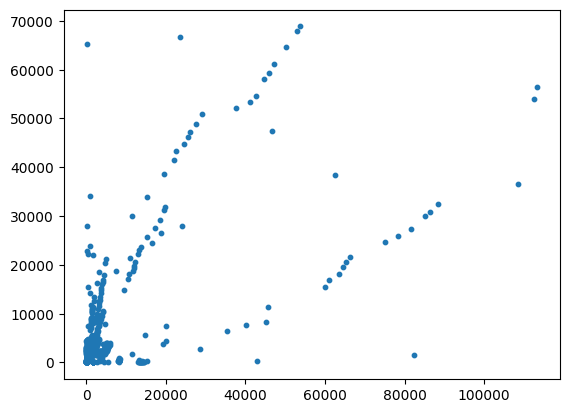

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('merged_facebook_twitter_data.csv')

# Select the number of downloads for Facebook as X (independent variable)
X = data['fb_data'].values.reshape(-1, 1)
print(len(X))

# Select the number of downloads for Twitter as y (dependent variable)
y = data['tw_data'].values.reshape(-1, 1)

plt.scatter(X, y, s=10)
plt.show()

<Axes: ylabel='fb_data'>

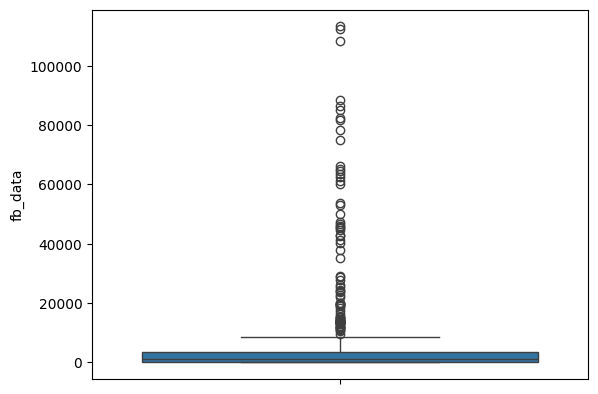

In [ ]:
sns.boxplot(data['fb_data'])

<Axes: ylabel='tw_data'>

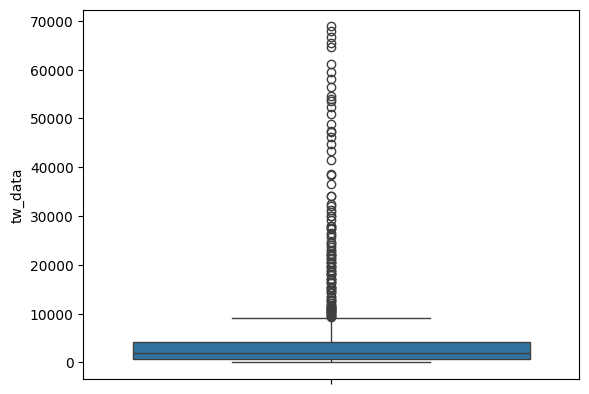

In [ ]:
sns.boxplot(data['tw_data'])

In [ ]:
x_outlier_indices = np.where(data['fb_data'] > 50000)
print(x_outlier_indices)

(array([370, 371, 372, 373, 374, 375, 376, 378, 379, 380, 381, 382, 383,
       384, 385, 386, 387, 542, 546, 547]),)


In [ ]:
x_no_outliers_data = data.drop(x_outlier_indices[0])

In [ ]:
x_no_outliers_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 0 to 683
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Agency         664 non-null    object 
 1   Month_Sampled  664 non-null    int64  
 2   fb_data        664 non-null    float64
 3   tw_data        664 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 25.9+ KB


In [ ]:
y_outlier_indices = np.where(x_no_outliers_data['tw_data'] > 50000)
print(y_outlier_indices)

(array([413, 515, 516, 517, 518, 520, 521, 523, 526]),)


In [ ]:
removed_outliers_data = x_no_outliers_data.drop(y_outlier_indices[0])

In [ ]:
removed_outliers_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 655 entries, 0 to 683
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Agency         655 non-null    object 
 1   Month_Sampled  655 non-null    int64  
 2   fb_data        655 non-null    float64
 3   tw_data        655 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 25.6+ KB


655


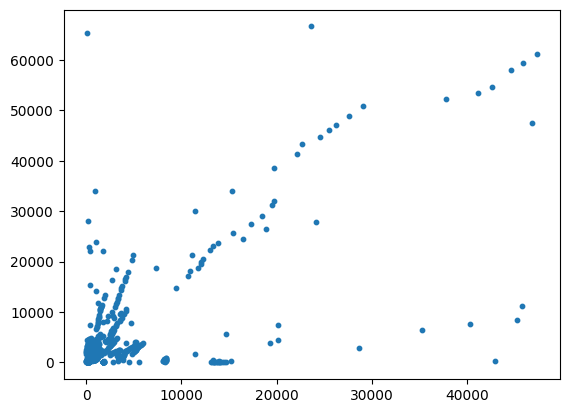

In [ ]:
# Select the number of downloads for Facebook as X (independent variable)
X = removed_outliers_data['fb_data'].values.reshape(-1, 1)
print(len(X))

# Select the number of downloads for Twitter as y (dependent variable)
y = removed_outliers_data['tw_data'].values.reshape(-1, 1)

plt.scatter(X, y, s=10)
plt.show()

<Axes: ylabel='fb_data'>

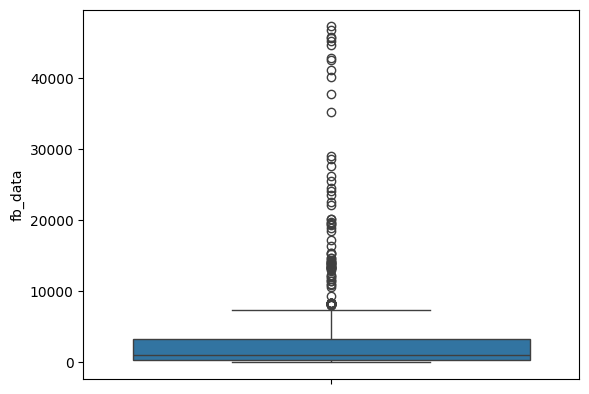

In [ ]:
sns.boxplot(removed_outliers_data['fb_data'])

<Axes: ylabel='tw_data'>

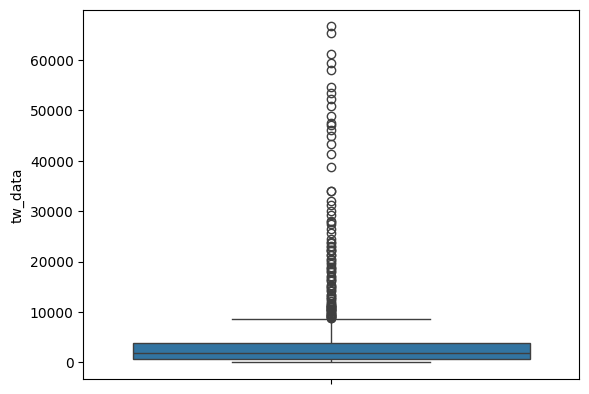

In [ ]:
sns.boxplot(removed_outliers_data['tw_data'])

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.15, random_state=42)

print(f'X-Train data shape : {X_train1.shape}, y-train data shape : {y_train1.shape}' )
print(f'X-test data shape : {X_test1.shape}, y-test data shape : {y_test1.shape}')


X-Train data shape : (556, 1), y-train data shape : (556, 1)
X-test data shape : (99, 1), y-test data shape : (99, 1)


In [ ]:
# Create polynomial features matrix
def create_polynomial_matrix(X, degree):
    X_poly_mat = []

    for i in range(1, degree + 1):
        X_poly = np.ones((len(X), 1))
        for d in range(1, i + 1):
            X_poly = np.concatenate((X_poly, X**d), axis=1)
        X_poly_mat.append(X_poly)
    return X_poly_mat


In [ ]:
# Define degree of polynomial
degree = 11

X_train_poly_mat = create_polynomial_matrix(X_train1, degree)


# computing the weight matrix for each polynominal.
theta_mat = []
for ele in X_train_poly_mat:  # Solve for coefficients using normal equation (closed-form)
    theta = np.linalg.inv(ele.T.dot(ele)).dot(ele.T).dot(y_train1)
    theta_mat.append(theta)

# printing the weights for each polynominal.
k = 1
for ele in theta_mat:
    print(f'The weight matrix for polynominal regression of degree {k} is :')
    print(ele)
    k += 1



The weight matrix for polynominal regression of degree 1 is :
[[1.84121102e+03]
 [8.88477821e-01]]
The weight matrix for polynominal regression of degree 2 is :
[[1.92151259e+03]
 [8.41539271e-01]
 [1.38000342e-06]]
The weight matrix for polynominal regression of degree 3 is :
[[ 2.75415094e+03]
 [ 4.68648948e-02]
 [ 6.84688313e-05]
 [-1.15123886e-09]]
The weight matrix for polynominal regression of degree 4 is :
[[ 2.95743182e+03]
 [-2.24147481e-01]
 [ 1.11338611e-04]
 [-3.02468855e-09]
 [ 2.34750819e-14]]
The weight matrix for polynominal regression of degree 5 is :
[[ 1.31511035e+03]
 [ 2.68593952e+00]
 [-6.06877296e-04]
 [ 5.08513159e-08]
 [-1.50269884e-12]
 [ 1.44732347e-17]]
The weight matrix for polynominal regression of degree 6 is :
[[ 9.11202812e+02]
 [ 3.62115948e+00]
 [-9.39766407e-04]
 [ 8.90248901e-08]
 [-3.34399036e-12]
 [ 5.35447830e-17]
 [-3.01473848e-22]]
The weight matrix for polynominal regression of degree 7 is :
[[ 1.19480531e+03]
 [ 2.84722625e+00]
 [-5.90532472e

In [ ]:
# Make predictions

X_test_poly_mat = create_polynomial_matrix(X_test1, degree)

def predict(X_poly_mat, theta_mat):
    y_pred_mat = []
    for ele1 , ele2 in zip(X_poly_mat, theta_mat):
        y_pred = ele1.dot(ele2)
        y_pred_mat.append(y_pred)
    return y_pred_mat

y_pred_mat = predict(X_test_poly_mat, theta_mat)


In [ ]:
# Evaluate the model
def mean_squared_error(y_true, y_pred_mat):
    mean_list = []
    for ele in y_pred_mat:
        value = np.mean((y_true - ele)**2)
        mean_list.append(value)
    return mean_list


In [ ]:
def r2_score(y_true, y_pred_mat):
    r2_list = []
    denominator = np.sum((y_true - np.mean(y_true))**2)
    for ele in y_pred_mat:
        numerator = np.sum((y_true - ele)**2)
        val = 1 - (numerator / denominator)
        r2_list.append(val)
    return r2_list


In [ ]:
mse_list = mean_squared_error(y_test1, y_pred_mat)
r2_list = r2_score(y_test1, y_pred_mat)


index = 1
for ele1, ele2 in zip(mse_list, r2_list):
    print(f"Root mean Squared Error for {index} degree polynominal model : {pow(ele1, 0.5)}")
    print(f"R-squared for {index} degree polynominal model : {ele2}")
    index += 1

LR_rmse = pow(mse_list[0], 0.5)
LR_accu = r2_list[0]

PR_rsme = pow(mse_list[5], 0.5)
PR_accu = r2_list[5]


Root mean Squared Error for 1 degree polynominal model : 5672.487829709861
R-squared for 1 degree polynominal model : 0.5359331606227988
Root mean Squared Error for 2 degree polynominal model : 5695.31630928356
R-squared for 2 degree polynominal model : 0.5321904438746402
Root mean Squared Error for 3 degree polynominal model : 5509.198869074993
R-squared for 3 degree polynominal model : 0.5622659905965899
Root mean Squared Error for 4 degree polynominal model : 5525.136938242202
R-squared for 4 degree polynominal model : 0.5597296049042848
Root mean Squared Error for 5 degree polynominal model : 5385.930448100313
R-squared for 5 degree polynominal model : 0.5816354550467467
Root mean Squared Error for 6 degree polynominal model : 5385.077210170499
R-squared for 6 degree polynominal model : 0.5817679989875064
Root mean Squared Error for 7 degree polynominal model : 5466.118838434018
R-squared for 7 degree polynominal model : 0.5690850817381362
Root mean Squared Error for 8 degree polyn

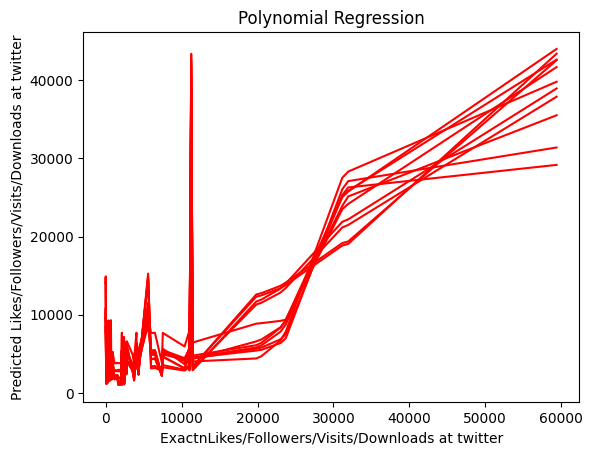

In [ ]:

# rmse_1 = pow(mse_list[0], 0.5)
# r2_1 = r2_list[0]

# rmse_2 = pow(min(mse_list), 0.5)
# r2_2 = max(r2_list)


# Plot data and polynomial regression curve
for ele in y_pred_mat:
    dummy_arr = np.concatenate((y_test1, ele), axis = 1)
    dummy_arr_list = sorted(dummy_arr.tolist())
    sorted_arr = np.array(dummy_arr_list)
    plt.plot(sorted_arr[:,0], sorted_arr[:,1], color='r')
plt.xlabel('ExactnLikes/Followers/Visits/Downloads at twitter')
plt.ylabel('Predicted Likes/Followers/Visits/Downloads at twitter')
plt.title('Polynomial Regression')
plt.show()



In [ ]:
removed_outliers_data

,Agency,Month_Sampled,fb_data,tw_data
0,311,1,1363.0,9360.0
1,311,3,1423.0,10139.0
2,311,4,1451.0,10391.0
3,311,4,1484.0,10562.0
4,311,5,1495.0,10622.0
...,...,...,...,...
679,Vets,11,305.0,141.0
680,Vets,11,566.0,472.0
681,Vets,11,572.0,487.0
682,Vets,12,312.0,153.0


In [ ]:
dummy_X = removed_outliers_data[['Agency', 'Month_Sampled']]

dummy_y = removed_outliers_data[['tw_data']]

print((dummy_X.values).shape)
print((dummy_y.values).shape)

dummy_X

(655, 2)
(655, 1)


,Agency,Month_Sampled
0,311,1
1,311,3
2,311,4
3,311,4
4,311,5
...,...,...
679,Vets,11
680,Vets,11
681,Vets,11
682,Vets,12


In [ ]:
one_hot_encoded_data = pd.get_dummies(dummy_X, columns = ['Agency', 'Month_Sampled'], dtype = int)

one_hot_encoded_data

,Agency_311,Agency_Applied Sciences NYC,Agency_CAU,Agency_City Charter,Agency_City Store,Agency_DCA,Agency_DEP,Agency_DFTA,Agency_DFTA (aging),Agency_DOB,...,Month_Sampled_3,Month_Sampled_4,Month_Sampled_5,Month_Sampled_6,Month_Sampled_7,Month_Sampled_8,Month_Sampled_9,Month_Sampled_10,Month_Sampled_11,Month_Sampled_12
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
one_hot_encoded_data['fb_data'] = removed_outliers_data['fb_data']

one_hot_encoded_data


,Agency_311,Agency_Applied Sciences NYC,Agency_CAU,Agency_City Charter,Agency_City Store,Agency_DCA,Agency_DEP,Agency_DFTA,Agency_DFTA (aging),Agency_DOB,...,Month_Sampled_4,Month_Sampled_5,Month_Sampled_6,Month_Sampled_7,Month_Sampled_8,Month_Sampled_9,Month_Sampled_10,Month_Sampled_11,Month_Sampled_12,fb_data
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1363.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1423.0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1451.0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1484.0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1495.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,305.0
680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,566.0
681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,572.0
682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,312.0


In [ ]:
c = one_hot_encoded_data.shape[1]
print(c)

50


In [ ]:
X = one_hot_encoded_data.values
print(X.shape)

(655, 50)


In [ ]:
Y = removed_outliers_data['tw_data'].values
Y = Y.reshape(-1, 1)
print(Y.shape)

(655, 1)


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.15, random_state=42)
print(f'X-Train data shape : {X_train2.shape}, y-train data shape : {y_train2.shape}' )
print(f'X-test data shape : {X_test2.shape}, y-test data shape : {y_test2.shape}')


X-Train data shape : (556, 50), y-train data shape : (556, 1)
X-test data shape : (99, 50), y-test data shape : (99, 1)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [ ]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X_train2, y_train2)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict(X_test2)
y_pred = y_pred.reshape(-1, 1)
# print the predicted price
print(y_pred.shape)
print(type(y_pred))

(99, 1)
<class 'numpy.ndarray'>


In [ ]:
print(y_test2.shape)

(99, 1)


In [ ]:
#print('Predicted like:')
#print(predictions, type(predictions))

error1 = np.mean((y_test2 - y_pred)**2)
error1 = pow(error1, 0.5)
print('The root mean squared error for Decision Tree is:', error1)


denominator = np.sum((y_test2 - np.mean(y_test2))**2)
numerator = np.sum((y_test2 - y_pred)**2)
val1 = 1 - (numerator / denominator)
print('The R2 score for Decision Tree is:', val1)

DT_rmse = error1
DT_accu = val1

The root mean squared error for Decision Tree is: 4259.640747229108
The R2 score for Decision Tree is: 0.7383146944308996


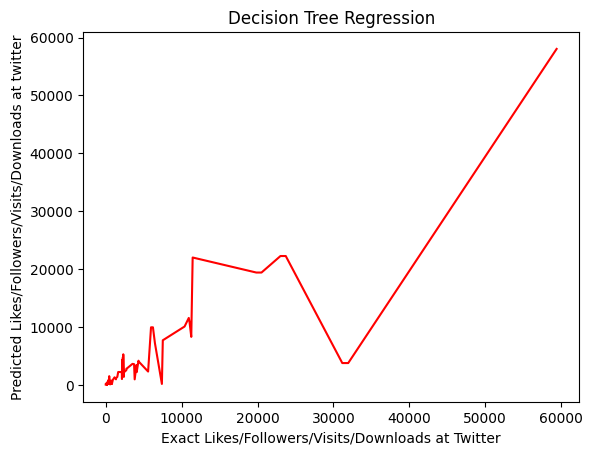

In [ ]:

dummy_arr = np.concatenate((y_test2, y_pred), axis = 1)
dummy_arr_list = sorted(dummy_arr.tolist())
sorted_arr = np.array(dummy_arr_list)
plt.plot(sorted_arr[:,0], sorted_arr[:,1], color='r')
plt.xlabel('Exact Likes/Followers/Visits/Downloads at Twitter')
plt.ylabel('Predicted Likes/Followers/Visits/Downloads at twitter')
plt.title('Decision Tree Regression')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# Fitting Random Forest Regression to the dataset
forest_regressor = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)

dummy_y_train2 = y_train2.reshape(-1)
print(dummy_y_train2.shape)

# Fit the regressor with x and y data
forest_regressor.fit(X_train2, dummy_y_train2)

(556,)


RandomForestRegressor(oob_score=True, random_state=0)

In [ ]:
predictions = forest_regressor.predict(X_test2)
predictions = predictions.reshape(-1, 1)
# print the predicted price
print(predictions.shape)
print(type(predictions))

(99, 1)
<class 'numpy.ndarray'>


In [ ]:
error2 = np.mean((y_test2 - predictions)**2)
error2 = pow(error2, 0.5)
print('The root mean squared error for Random forest is:', error2)


denominator = np.sum((y_test2 - np.mean(y_test2))**2)
numerator = np.sum((y_test2 - predictions)**2)
val2 = 1 - (numerator / denominator)
print('The R2 score for Random forest is:', val2)

RF_rsme = error2
RF_accu = val2


The root mean squared error for Random forest is: 2383.389949417118
The R2 score for Random forest is: 0.9180736516016369


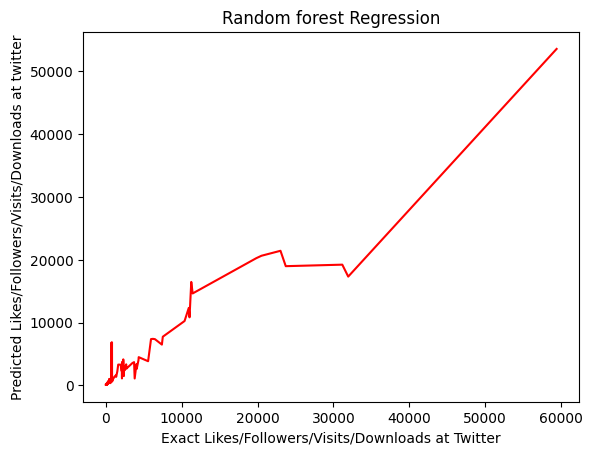

In [ ]:
dummy_arr = np.concatenate((y_test2, predictions), axis = 1)
dummy_arr_list = sorted(dummy_arr.tolist())
sorted_arr = np.array(dummy_arr_list)
plt.plot(sorted_arr[:,0], sorted_arr[:,1], color='r')
plt.xlabel('Exact Likes/Followers/Visits/Downloads at Twitter')
plt.ylabel('Predicted Likes/Followers/Visits/Downloads at twitter')
plt.title('Random forest Regression')
plt.show()

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize the XGBRegressor model
model = XGBRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train2, dummy_y_train2)


# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on test set using the best model
best_model = grid_search.best_estimator_
predictions2 = best_model.predict(X_test2)



Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


In [ ]:
predictions2 = predictions2.reshape(-1, 1)
# print the predicted price
print(predictions2.shape)
print(type(predictions2))

(99, 1)
<class 'numpy.ndarray'>


In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test2, predictions2)
mse = pow(mse, 0.5)
print('Root mean Squared Error:', mse)

# Calculate the R2 score
r2 = r2_score(y_test2, predictions2)
print('R2 Score:', r2)

XGB_rsme = mse
XGB_accu = r2

Root mean Squared Error: 2591.112297990427
R2 Score: 0.9031709074227244


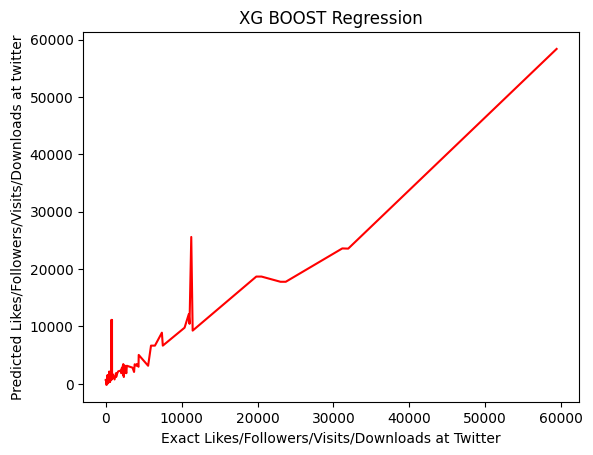

In [ ]:
dummy_arr = np.concatenate((y_test2, predictions2), axis = 1)
dummy_arr_list = sorted(dummy_arr.tolist())
sorted_arr = np.array(dummy_arr_list)
plt.plot(sorted_arr[:,0], sorted_arr[:,1], color='r')
plt.xlabel('Exact Likes/Followers/Visits/Downloads at Twitter')
plt.ylabel('Predicted Likes/Followers/Visits/Downloads at twitter')
plt.title('XG BOOST Regression')
plt.show()

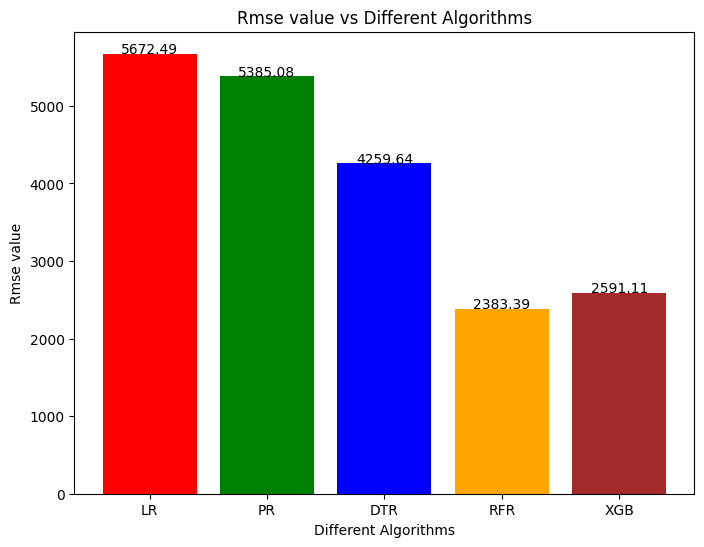

In [ ]:
rmse_list = [LR_rmse, PR_rsme, DT_rmse, RF_rsme, XGB_rsme]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 2), ha = 'center')

if __name__ == '__main__':

    # creating data on which bar chart will be plot
    x = ['LR', 'PR', 'DTR', 'RFR', 'XGB']
    y = rmse_list

    # setting figure size by using figure() function
    plt.figure(figsize = (8, 6))

    # making the bar chart on the data
    plt.bar(x, y, width = 0.8, color = ['red', 'green', 'blue', 'orange', 'brown'])

    # calling the function to add value labels
    addlabels(x, y)

    # giving title to the plot
    plt.title('Rmse value vs Different Algorithms')

    # giving X and Y labels
    plt.xlabel('Different Algorithms')
    plt.ylabel('Rmse value')

    # visualizing the plot
    plt.show()



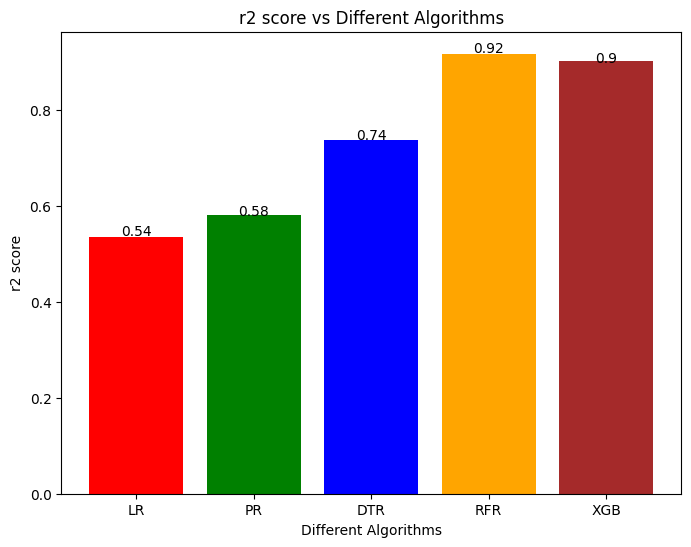

In [ ]:
r2_score_list = [LR_accu, PR_accu, DT_accu, RF_accu, XGB_accu]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 2), ha = 'center')

if __name__ == '__main__':

    # creating data on which bar chart will be plot
    x = ['LR', 'PR', 'DTR', 'RFR', 'XGB']
    y = r2_score_list

    # setting figure size by using figure() function
    plt.figure(figsize = (8, 6))

    # making the bar chart on the data
    plt.bar(x, y, width = 0.8, color = ['red', 'green', 'blue', 'orange', 'brown'])

    # calling the function to add value labels
    addlabels(x, y)

    # giving title to the plot
    plt.title('r2 score vs Different Algorithms')

    # giving X and Y labels
    plt.xlabel('Different Algorithms')
    plt.ylabel('r2 score')

    # visualizing the plot
    plt.show()


<ipython-input-78-8d488dd27c37>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


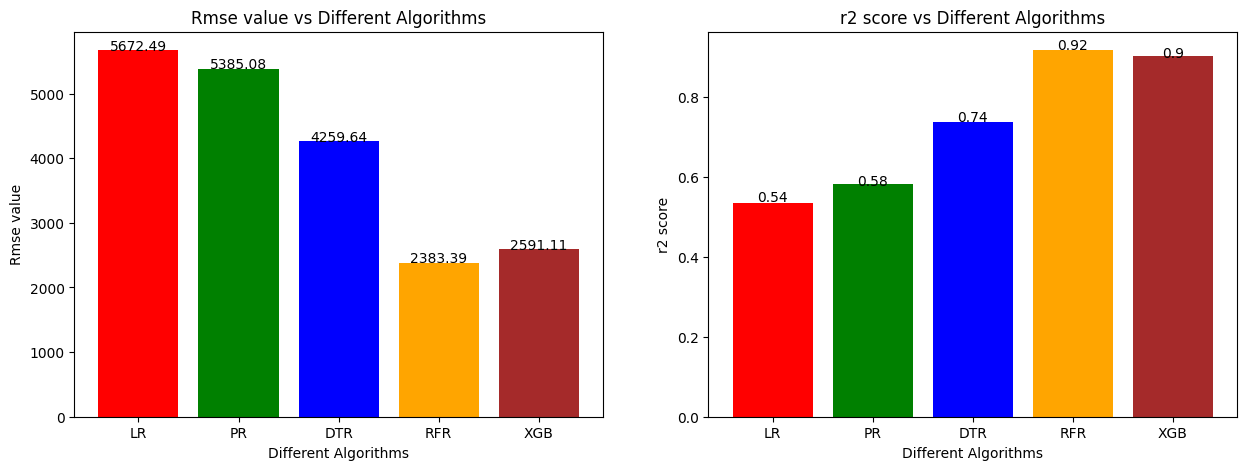

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 2), ha = 'center')

if __name__ == '__main__':

    # creating data on which bar chart will be plot
    x = ['LR', 'PR', 'DTR', 'RFR', 'XGB']
    y1 = rmse_list
    y2 = r2_score_list

    plt.subplots(figsize=(15, 5))

    # using subplot function and creating
    # plot one
    plt.subplot(1, 2, 1)
    plt.bar(x, y1, width = 0.8, color = ['red', 'green', 'blue', 'orange', 'brown'])
    addlabels(x, y1)
    plt.title('Rmse value vs Different Algorithms')
    plt.xlabel('Different Algorithms')
    plt.ylabel('Rmse value')

    # using subplot function and creating plot two
    plt.subplot(1, 2, 2)
    plt.bar(x, y2, width = 0.8, color = ['red', 'green', 'blue', 'orange', 'brown'])
    addlabels(x, y2)
    plt.title('r2 score vs Different Algorithms')
    plt.xlabel('Different Algorithms')
    plt.ylabel('r2 score')
    plt.show()
